#### I. Considering the simple mathematical formular

$$y = x^3 + \sin(x)$$

* Using numpy, generate 20 random values between 0 and 1 for the values of x i.e $x \in [0, 1]$
* Write a function for the formular and generate the corresponding values of $y$ for the generated $x$-values above
* Visualize the plot of the given equation with the generated values

Note: Set the numpy random seed to 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)
a=np.random.rand(20)
a

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578])

In [3]:
z=[]
def f(n):
    z.append(n**3+np.sin(n))
    return z
f(a)

[array([1.15596879, 0.0207594 , 0.84650486, 1.10062286, 0.60199838,
        0.2342679 , 0.20454023, 1.12920229, 0.17314225, 0.08891436,
        0.95487752, 1.68198001, 0.00394832, 0.62445834, 1.26270838,
        0.80474866, 1.03668784, 0.31261485, 1.56730088, 1.02017269])]

In [4]:
# Rounds to 2 dp and converts list to a 1 dimensional array

b= np.round(z,2)
b= b.reshape(20,)
b

array([1.16, 0.02, 0.85, 1.1 , 0.6 , 0.23, 0.2 , 1.13, 0.17, 0.09, 0.95,
       1.68, 0.  , 0.62, 1.26, 0.8 , 1.04, 0.31, 1.57, 1.02])

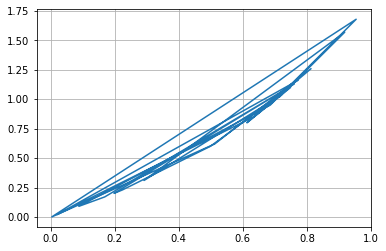

In [5]:
plt.plot(a,b)
plt.grid()

# 2

#### II. Swarm Behaviour Research Case Study

The SwarmyAI Hub is currently engaged in research studies to investigate behavioural pattern of swarms in their habitat. A typical swarm exhibit a **"flocking"** or **"non-flocking"** pattern in their movement from one place to another. In addition to this individual movement style, while in a group, in their movement pattern may be aligned or not.

As urgency demands in Swarmy's next publication, the hub requires your service as a ML Engineer to develop predictive model to determine to the movement pattern of some swarms that are yet to be categorised based on their ***flocking or non-flocking movement pattern only***. You have been provided with previously categorized and yet to dataset of the swarm movement pattern. Based on this, you are require to:-
 * perform descriptive statistics, EDA and data preprocessing (if needed)
 * build a baseline (simple) model
 * explore II other hyperparameterized models
 * evaluate the performance of your best model on the test dataset using appropriate metric
 * visualize and interprete the confusion matrix of your class label prediction on the test dataset

 
 
Dataset Attribute Information: The attributes are xm, ym as the (X,Y) position of each boid, xVeln, yVeln as the velocity vector, xAm, yAm as the alignment vector, xSm, ySm as the separation vector, xCm, yCm as the cohesion vector, nACm as the number of boids in the radius of Alignment/Cohesion, and nSm as the number of boids in the radius of Separation. **The class label is 1 - flocking and 0 - non-flocking**

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std

In [7]:
df1=pd.read_csv("../../swarm_train_data.csv")
df2=pd.read_csv("../../swarm_test_data.csv")
train_set, test_set = train_test_split(df1, test_size=0.3, random_state=42)
train_set

C:\Users\ANIEMA E\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
1126,242.09,936.45,1.80,7.11,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,3,0,1
12154,307.56,-982.01,1.24,8.23,-0.22,1.02,0.00,0.00,0.00,0.00,...,11.46,-0.26,1.01,0.00,0.00,0.00,0.00,14,0,1
17678,1134.89,-417.73,-0.11,-9.08,0.75,-0.66,-1.89,-2.81,2.38,-1.23,...,-13.42,0.82,-0.57,0.07,-1.84,2.66,0.30,102,9,1
11625,-1126.75,368.13,5.52,10.13,0.00,1.00,0.00,0.00,0.00,0.00,...,7.82,0.00,1.00,-0.36,3.22,0.00,0.00,34,0,0
14900,407.36,-63.17,-9.94,-4.02,0.00,0.00,0.00,0.00,0.00,0.00,...,-15.43,0.00,0.00,0.00,0.00,0.00,0.00,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-370.63,119.81,-7.15,-2.05,-0.95,-0.30,0.00,0.00,-0.98,-0.20,...,1.93,-0.96,0.27,0.00,0.00,-0.96,0.27,1,0,1
11964,1003.81,365.05,2.39,-4.52,-0.01,-0.10,0.00,0.00,0.26,-0.19,...,-2.96,0.01,-0.03,0.00,0.00,0.00,0.00,4,1,0
5390,-463.52,-671.07,-1.26,-1.85,0.00,0.00,0.37,0.24,-0.94,-0.34,...,-2.24,0.00,0.00,0.14,-0.42,-0.28,0.96,112,35,1
860,538.13,-557.30,4.66,-12.75,-1.00,-1.00,0.00,0.00,0.00,0.00,...,5.20,-1.00,0.00,-12.87,9.50,0.00,0.00,11,0,0


In [8]:
test_set

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
4168,-43.37,125.84,5.21,-9.36,0.00,0.0,0.00,0.00,0.24,-0.21,...,-7.19,0.00,0.0,0.00,0.00,-0.21,-0.24,8,0,0
10018,1308.78,-128.67,6.20,-7.17,0.00,0.0,0.00,0.00,0.00,0.00,...,-3.43,0.00,0.0,0.00,0.00,0.00,0.00,6,0,0
4903,928.24,-157.45,-1.20,-7.07,0.00,0.0,0.00,0.00,0.00,0.00,...,-2.33,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0
5151,-459.53,-662.63,-0.17,-2.02,0.00,0.0,0.29,0.33,-0.83,-0.56,...,-3.08,0.00,0.0,0.31,-0.31,-0.56,0.83,112,50,1
10610,-79.14,24.15,11.96,-10.14,-1.00,0.0,0.00,0.00,0.00,0.00,...,-7.44,-1.00,-1.0,0.00,0.00,0.00,0.00,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15667,948.24,-712.19,-2.13,-0.86,0.00,0.0,0.00,0.00,0.00,0.00,...,-13.70,0.00,0.0,0.00,0.00,0.00,0.00,18,0,0
8508,1002.56,-881.16,-0.33,9.06,-0.04,1.0,0.00,0.00,-0.04,1.00,...,7.31,-0.02,1.0,0.00,0.00,-0.02,1.00,14,4,1
6260,-834.07,-829.71,-18.06,-7.30,0.00,0.0,0.00,0.00,0.00,0.00,...,-13.38,0.00,0.0,0.00,0.00,0.00,0.00,29,0,0
8358,-1060.11,490.66,-0.15,17.26,0.00,1.0,-0.50,3.20,0.00,0.00,...,15.98,0.00,1.0,0.00,0.00,0.00,0.00,18,0,0


In [9]:
# baseline model

model1=LogisticRegression()

X= train_set.loc[:,"xVel1"]
X=X.values
X=X.reshape(-1,1)
y=train_set.iloc[:,-1]
model1.fit(X,y)
model1.score(X,y)

0.6075818859544769

In [10]:
X1= train_set.loc[:,["x3","xVel3","nAC3","nS3"]]
X1=X1.values
model1.fit(X1,y)
model1.score(X1,y)

0.6918074391307796

In [11]:
#first hyperparametized model

knn=KNeighborsClassifier(metric='manhattan',p=5,n_neighbors=7)
knn.fit(X1,y)
knn.score(X1,y)

0.86676183678325

In [12]:
%%capture
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model1_cv=GridSearchCV(model1,grid,cv=3)
model1_cv.fit(X,y)
print(model1_cv.best_params_)

In [13]:
#2nd hyperparametized model(logistic regression) using best parameters from GridSearchCV
model2=LogisticRegression(C= 0.01,penalty='l2')
model2.fit(X1,y)
model2.score(X1,y)

0.6977555714172416

In [14]:
#predict class label of test data set(train test split)

X2=test_set.loc[:,['x3','xVel3','nAC3','nS3']]
X2=X2.values
y_pred=knn.predict(X2)
#y_pred=y_pred.reshape(-1,1)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
#Performance (Accuracy) of my best model


cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(knn, X1, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.794 (0.009)


In [16]:
#confusion matrix

from sklearn.metrics import confusion_matrix
y_test= test_set.iloc[:,-1]
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2117  517]
 [ 584 2186]]


#True Positive=2117

#True Negative=2186

#False Positive=517

#False Negative=584

In [17]:
y_test.count()

5404

In [18]:
#predict class label of test data set(df2)

X3=df2.loc[:,['x3','xVel3','nAC3','nS3']]
X3=X3.values
y_pred1=knn.predict(X3)
#y_pred1=y_pred1.reshape(-1,1)
y_pred1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X1,y)
dtc.score(X1,y)

1.0

In [20]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dtc, X1, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.948 (0.004)
